# Preparation

In [1]:
import itertools
from collections import namedtuple, defaultdict


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

plt.rcParams["figure.dpi"] = 300

sns.set()

from PIL import Image

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from memes.utils import DATA_DIR, HashClusters, read_id_to_info
from memes.visualization_utils import draw_grid

In [4]:
hc = HashClusters(
    "../data/filepaths/all.tsv",
    "../data/imagehashes/all-8-processed-hashes.tsv",
    "../data/clusters/all-8-processed-leiden.tsv"
)

29082578it [00:46, 631255.51it/s]
16662070it [00:52, 319238.39it/s]
10981044it [00:31, 347317.30it/s]


In [5]:
def load_template_clusters(path=DATA_DIR / "semantic_clusters/all-8-processed-clusters.tsv"):
    TplCluster = namedtuple("TplCluster", ["tpl_to_cluster", "cluster_to_tpl"])

    tpl_to_cluster = {}
    cluster_to_tpl = defaultdict(set)
    for line in open(path, "r"):
        tpl, cluster = line.strip().split("\t")
        tpl_to_cluster[tpl] = cluster
        cluster_to_tpl[cluster].add(tpl)
    return TplCluster(tpl_to_cluster, dict(cluster_to_tpl))

template_clusters = load_template_clusters(DATA_DIR / "semantic_clusters/all-8-processed-clusters-norm-50.tsv")


In [6]:
subreddit_info = read_id_to_info()

  0%|          | 0/157 [00:00<?, ?it/s]

/shared/2/projects/meme-culture/data/RS_2014-12.gz
/shared/2/projects/meme-culture/data/RS_2011-12.gz
/shared/2/projects/meme-culture/data/RS_2017-12.gz


  2%|▏         | 3/157 [00:00<00:22,  6.71it/s]

/shared/2/projects/meme-culture/data/RS_2012-07.gz
/shared/2/projects/meme-culture/data/RS_2014-07.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-08.gz
/shared/2/projects/meme-culture/data/RS_v2_2008-11.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-03.gz
/shared/2/projects/meme-culture/data/RS_2011-02.gz
/shared/2/projects/meme-culture/data/RS_2012-03.gz
/shared/2/projects/meme-culture/data/RS_2021-06.gz


  7%|▋         | 11/157 [00:02<00:36,  3.95it/s]

/shared/2/projects/meme-culture/data/RS_2020-12.gz


 11%|█         | 17/157 [00:05<00:47,  2.96it/s]

/shared/2/projects/meme-culture/data/RS_2015-04.gz
/shared/2/projects/meme-culture/data/RS_2016-05.gz
/shared/2/projects/meme-culture/data/RS_2011-09.gz
/shared/2/projects/meme-culture/data/RS_v2_2010-04.gz
/shared/2/projects/meme-culture/data/RS_2016-07.gz
/shared/2/projects/meme-culture/data/RS_2013-01.gz
/shared/2/projects/meme-culture/data/RS_2020-02.gz


 12%|█▏        | 19/157 [00:09<01:29,  1.55it/s]

/shared/2/projects/meme-culture/data/RS_2018-09.gz


 13%|█▎        | 21/157 [00:10<01:23,  1.63it/s]

/shared/2/projects/meme-culture/data/RS_v2_2010-05.gz
/shared/2/projects/meme-culture/data/RS_2019-05.gz


 14%|█▍        | 22/157 [00:21<04:34,  2.03s/it]

/shared/2/projects/meme-culture/data/RS_2021-05.gz


 15%|█▍        | 23/157 [00:24<05:05,  2.28s/it]

/shared/2/projects/meme-culture/data/RS_2019-02.gz


 15%|█▌        | 24/157 [00:27<05:06,  2.31s/it]

/shared/2/projects/meme-culture/data/RS_2013-04.gz
/shared/2/projects/meme-culture/data/RS_2021-02.gz


 17%|█▋        | 26/157 [00:29<04:12,  1.92s/it]

/shared/2/projects/meme-culture/data/RS_2018-03.gz


 17%|█▋        | 27/157 [00:30<03:36,  1.67s/it]

/shared/2/projects/meme-culture/data/RS_2016-02.gz
/shared/2/projects/meme-culture/data/RS_2018-11.gz


 18%|█▊        | 29/157 [00:31<02:48,  1.32s/it]

/shared/2/projects/meme-culture/data/RS_2013-11.gz
/shared/2/projects/meme-culture/data/RS_2013-10.gz
/shared/2/projects/meme-culture/data/RS_2012-01.gz
/shared/2/projects/meme-culture/data/RS_2017-07.gz


 21%|██        | 33/157 [00:32<01:30,  1.37it/s]

/shared/2/projects/meme-culture/data/RS_2016-09.gz
/shared/2/projects/meme-culture/data/RS_v2_2008-12.gz
/shared/2/projects/meme-culture/data/RS_2016-12.gz


 23%|██▎       | 36/157 [00:33<01:07,  1.78it/s]

/shared/2/projects/meme-culture/data/RS_2018-08.gz


 24%|██▎       | 37/157 [00:34<01:14,  1.61it/s]

/shared/2/projects/meme-culture/data/RS_2020-03.gz


 28%|██▊       | 44/157 [00:38<00:57,  1.97it/s]

/shared/2/projects/meme-culture/data/RS_2014-03.gz
/shared/2/projects/meme-culture/data/RS_2015-05.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-09.gz
/shared/2/projects/meme-culture/data/RS_2014-02.gz
/shared/2/projects/meme-culture/data/RS_2014-11.gz
/shared/2/projects/meme-culture/data/RS_2012-06.gz
/shared/2/projects/meme-culture/data/RS_2019-08.gz


 29%|██▉       | 46/157 [00:41<01:25,  1.29it/s]

/shared/2/projects/meme-culture/data/RS_v2_2009-10.gz
/shared/2/projects/meme-culture/data/RS_v2_2010-09.gz
/shared/2/projects/meme-culture/data/RS_2011-04.gz
/shared/2/projects/meme-culture/data/RS_2013-02.gz
/shared/2/projects/meme-culture/data/RS_2015-09.gz
/shared/2/projects/meme-culture/data/RS_2011-01.gz
/shared/2/projects/meme-culture/data/RS_2011-05.gz
/shared/2/projects/meme-culture/data/RS_2014-09.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-12.gz
/shared/2/projects/meme-culture/data/RS_v2_2008-09.gz
/shared/2/projects/meme-culture/data/RS_2011-08.gz
/shared/2/projects/meme-culture/data/RS_2019-01.gz


 36%|███▋      | 57/157 [00:54<01:43,  1.03s/it]

/shared/2/projects/meme-culture/data/RS_v2_2010-08.gz
/shared/2/projects/meme-culture/data/RS_2020-08.gz


 38%|███▊      | 59/157 [00:58<01:56,  1.19s/it]

/shared/2/projects/meme-culture/data/RS_v2_2010-12.gz
/shared/2/projects/meme-culture/data/RS_v2_2008-07.gz
/shared/2/projects/meme-culture/data/RS_2017-02.gz


 39%|███▉      | 62/157 [00:59<01:28,  1.07it/s]

/shared/2/projects/meme-culture/data/RS_2012-12.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-02.gz
/shared/2/projects/meme-culture/data/RS_2013-05.gz
/shared/2/projects/meme-culture/data/RS_v2_2010-11.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-01.gz
/shared/2/projects/meme-culture/data/RS_v2_2010-01.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-06.gz
/shared/2/projects/meme-culture/data/RS_v2_2008-10.gz
/shared/2/projects/meme-culture/data/RS_2014-08.gz
/shared/2/projects/meme-culture/data/RS_2019-09.gz


 46%|████▌     | 72/157 [01:02<00:52,  1.60it/s]

/shared/2/projects/meme-culture/data/RS_v2_2010-07.gz
/shared/2/projects/meme-culture/data/RS_2015-02.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-07.gz
/shared/2/projects/meme-culture/data/RS_2015-10.gz
/shared/2/projects/meme-culture/data/RS_2020-06.gz


 49%|████▉     | 77/157 [01:06<00:54,  1.47it/s]

/shared/2/projects/meme-culture/data/RS_2012-10.gz
/shared/2/projects/meme-culture/data/RS_2012-02.gz
/shared/2/projects/meme-culture/data/RS_2017-05.gz


 52%|█████▏    | 81/157 [01:08<00:45,  1.67it/s]

/shared/2/projects/meme-culture/data/RS_2016-10.gz
/shared/2/projects/meme-culture/data/RS_2018-04.gz


 52%|█████▏    | 82/157 [01:09<00:45,  1.64it/s]

/shared/2/projects/meme-culture/data/RS_2020-11.gz


 53%|█████▎    | 83/157 [01:12<01:14,  1.01s/it]

/shared/2/projects/meme-culture/data/RS_2014-10.gz
/shared/2/projects/meme-culture/data/RS_2017-04.gz


 54%|█████▍    | 85/157 [01:13<00:57,  1.26it/s]

/shared/2/projects/meme-culture/data/RS_2018-05.gz


 55%|█████▍    | 86/157 [01:14<00:57,  1.24it/s]

/shared/2/projects/meme-culture/data/RS_2020-07.gz


 55%|█████▌    | 87/157 [01:18<01:42,  1.46s/it]

/shared/2/projects/meme-culture/data/RS_2016-04.gz
/shared/2/projects/meme-culture/data/RS_2020-01.gz


 57%|█████▋    | 89/157 [01:22<01:49,  1.61s/it]

/shared/2/projects/meme-culture/data/RS_2015-12.gz
/shared/2/projects/meme-culture/data/RS_2012-08.gz
/shared/2/projects/meme-culture/data/RS_v2_2010-10.gz
/shared/2/projects/meme-culture/data/RS_2018-01.gz


 59%|█████▉    | 93/157 [01:22<00:55,  1.15it/s]

/shared/2/projects/meme-culture/data/RS_2019-10.gz


 60%|█████▉    | 94/157 [01:39<03:25,  3.27s/it]

/shared/2/projects/meme-culture/data/RS_2018-07.gz


 61%|██████    | 95/157 [01:40<02:56,  2.84s/it]

/shared/2/projects/meme-culture/data/RS_2011-03.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-11.gz
/shared/2/projects/meme-culture/data/RS_2014-04.gz
/shared/2/projects/meme-culture/data/RS_2018-02.gz


 63%|██████▎   | 99/157 [01:40<01:25,  1.47s/it]

/shared/2/projects/meme-culture/data/RS_v2_2010-03.gz
/shared/2/projects/meme-culture/data/RS_2016-01.gz
/shared/2/projects/meme-culture/data/RS_2019-07-01-24.gz


 65%|██████▍   | 102/157 [01:43<01:09,  1.27s/it]

/shared/2/projects/meme-culture/data/RS_2020-05.gz


 69%|██████▉   | 108/157 [01:47<00:41,  1.17it/s]

/shared/2/projects/meme-culture/data/RS_2012-11.gz
/shared/2/projects/meme-culture/data/RS_2015-08.gz
/shared/2/projects/meme-culture/data/RS_2013-12.gz
/shared/2/projects/meme-culture/data/RS_2011-10.gz
/shared/2/projects/meme-culture/data/RS_2015-06.gz
/shared/2/projects/meme-culture/data/RS_2018-12.gz
/shared/2/projects/meme-culture/data/RS_2019-03.gz


 70%|███████   | 110/157 [01:52<00:56,  1.20s/it]

/shared/2/projects/meme-culture/data/RS_2018-10.gz
/shared/2/projects/meme-culture/data/RS_2019-04.gz


 71%|███████▏  | 112/157 [01:57<01:06,  1.48s/it]

/shared/2/projects/meme-culture/data/RS_2020-10.gz


 72%|███████▏  | 113/157 [02:00<01:18,  1.78s/it]

/shared/2/projects/meme-culture/data/RS_v2_2010-02.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-05.gz
/shared/2/projects/meme-culture/data/RS_2019-07.gz


 74%|███████▍  | 116/157 [02:04<01:04,  1.57s/it]

/shared/2/projects/meme-culture/data/RS_2017-10.gz


 75%|███████▍  | 117/157 [02:05<00:56,  1.40s/it]

/shared/2/projects/meme-culture/data/RS_2012-09.gz
/shared/2/projects/meme-culture/data/RS_2021-01.gz


 76%|███████▌  | 119/157 [02:08<00:56,  1.48s/it]

/shared/2/projects/meme-culture/data/RS_2016-06.gz
/shared/2/projects/meme-culture/data/RS_2014-06.gz
/shared/2/projects/meme-culture/data/RS_2015-07.gz
/shared/2/projects/meme-culture/data/RS_2020-04.gz


 78%|███████▊  | 123/157 [02:12<00:42,  1.26s/it]

/shared/2/projects/meme-culture/data/RS_2011-11.gz
/shared/2/projects/meme-culture/data/RS_2019-06.gz


 82%|████████▏ | 129/157 [02:37<01:06,  2.37s/it]

/shared/2/projects/meme-culture/data/RS_2011-07.gz
/shared/2/projects/meme-culture/data/RS_v2_2009-04.gz
/shared/2/projects/meme-culture/data/RS_2014-01.gz
/shared/2/projects/meme-culture/data/RS_2016-08.gz
/shared/2/projects/meme-culture/data/RS_2013-03.gz
/shared/2/projects/meme-culture/data/RS_2019-12.gz


 83%|████████▎ | 131/157 [02:41<00:59,  2.28s/it]

/shared/2/projects/meme-culture/data/RS_2011-06.gz
/shared/2/projects/meme-culture/data/RS_2017-09.gz


 85%|████████▍ | 133/157 [02:41<00:42,  1.77s/it]

/shared/2/projects/meme-culture/data/RS_2014-05.gz
/shared/2/projects/meme-culture/data/RS_2013-09.gz
/shared/2/projects/meme-culture/data/RS_2019-11.gz


 87%|████████▋ | 136/157 [02:46<00:35,  1.69s/it]

/shared/2/projects/meme-culture/data/RS_2012-04.gz
/shared/2/projects/meme-culture/data/RS_2017-01.gz


 88%|████████▊ | 138/157 [02:46<00:24,  1.31s/it]

/shared/2/projects/meme-culture/data/RS_2015-11.gz
/shared/2/projects/meme-culture/data/RS_2017-08.gz


 89%|████████▉ | 140/157 [02:47<00:17,  1.03s/it]

/shared/2/projects/meme-culture/data/RS_2013-08.gz
/shared/2/projects/meme-culture/data/RS_2017-03.gz


 92%|█████████▏| 144/157 [02:47<00:08,  1.60it/s]

/shared/2/projects/meme-culture/data/RS_v2_2008-08.gz
/shared/2/projects/meme-culture/data/RS_2016-11.gz
/shared/2/projects/meme-culture/data/RS_2017-06.gz


 92%|█████████▏| 145/157 [02:48<00:07,  1.67it/s]

/shared/2/projects/meme-culture/data/RS_2015-01.gz
/shared/2/projects/meme-culture/data/RS_2016-03.gz
/shared/2/projects/meme-culture/data/RS_2020-09.gz


 94%|█████████▍| 148/157 [02:52<00:08,  1.10it/s]

/shared/2/projects/meme-culture/data/RS_2013-07.gz
/shared/2/projects/meme-culture/data/RS_2015-03.gz
/shared/2/projects/meme-culture/data/RS_2012-05.gz
/shared/2/projects/meme-culture/data/RS_2021-03.gz


 97%|█████████▋| 152/157 [02:55<00:04,  1.19it/s]

/shared/2/projects/meme-culture/data/RS_v2_2010-06.gz
/shared/2/projects/meme-culture/data/RS_2017-11.gz


 98%|█████████▊| 154/157 [02:55<00:02,  1.43it/s]

/shared/2/projects/meme-culture/data/RS_2013-06.gz
/shared/2/projects/meme-culture/data/RS_2021-04.gz


 99%|█████████▉| 156/157 [02:58<00:00,  1.15it/s]

/shared/2/projects/meme-culture/data/RS_2018-06.gz


100%|██████████| 157/157 [02:59<00:00,  1.14s/it]


In [7]:
def template_to_ids(tpl):
    ids = set()
    phashes = hc.cluster_to_hash[tpl]
    for phash in phashes:
        ids.update(hc.hash_to_ids[phash])
    return ids

def get_instances(templates):
    return list(itertools.chain.from_iterable([
        [dict(template=template, **subreddit_info[pid]._asdict()) for pid in template_to_ids(template)] for template in templates
    ]))

def posts_in_subs(subs):
    instances = []
    for cluster in tqdm(template_clusters.cluster_to_tpl):
        instances += posts_in_subs_and_cluster(subs, cluster)
    return instances
        
def posts_in_subs_and_cluster(subs, cluster):
    templates = template_clusters.cluster_to_tpl[cluster]
    instances = get_instances(templates)
    return [{"cluster": cluster, **instance} for instance in instances if instance["subreddit"] in subs]

all_subs_in_dataset = set([post.subreddit for post in tqdm(subreddit_info.values())])
all_memes = posts_in_subs(all_subs_in_dataset)
df = pd.DataFrame(all_memes)

  0%|          | 0/27494802 [00:00<?, ?it/s]

  0%|          | 0/784 [00:00<?, ?it/s]

In [8]:
print(f"There are {len(df)} posts")
print(f"There are {len(df.cluster.value_counts())} semantic clusters.")

There are 3825199 posts
There are 784 semantic clusters.


# Variation

In [9]:
from collections import namedtuple, defaultdict
DocTermMatrix = namedtuple("DocTermMatrix", ("mat", "idx2word", "word2idx", "idx2doc", "doc2idx"))

def create_doc_term_mat(df, document_col, word_col, progress=False):
    idx2word = list(df[word_col].unique())
    word2idx = {v: k for k, v in enumerate(idx2word)}
    idx2doc = list(df[document_col].unique())
    doc2idx = {v: k for k, v in enumerate(idx2doc)}
    mat = np.zeros((len(doc2idx), len(word2idx)))
    for doc, word in tqdm(zip(df[document_col], df[word_col]), total=len(df), disable=not progress):
        mat[doc2idx[doc]][word2idx[word]] += 1
        
    return DocTermMatrix(mat, idx2word, word2idx, idx2doc, doc2idx)


def logodds(matrix, group1, group2=None, min_occurrences=0, zscore=True):
    """
    Compute log odds for one against rest for K documents with N total unique words.
    
    The prior is computed over all of the words
    
    Filter out words with less than min_occurrences co-occurrences.
    """
    if not (isinstance(group1, set) or isinstance(group1, list)):
        group1 = set([group1])
    if not (isinstance(group2, set) or isinstance(group2, list)):
        group2 = set([group2])
        
    mat = matrix.mat.copy()
    mat[mat < min_occurrences] = 0

    _check_group1 = lambda x: x in group1
    _check_group2 = lambda x: (x in group2) if group2 is not None else (not _check_group1(x))
    
    eps = 1e-8
    def _log_odds_delta(mat, group1_idx, group2_idx, zscore):
        n_prior = mat.sum()
        g_1 = mat[group1_idx].sum(axis=0)
        g_2 = mat[group2_idx].sum(axis=0)
        n_1 = g_1.sum()
        n_2 = g_2.sum()

        prior = mat.sum(axis=0)

        l1 = (g_1 + prior) / ((n_1 + n_prior) - (g_1 + prior))
        l2 = (g_2 + prior) / ((n_2 + n_prior) - (g_2 + prior))
        delta = (np.log(l1) - np.log(l2))
        if zscore:
            sigma = np.sqrt(1 / (g_1 + prior) + 1 / (g_2 + prior))
            delta = delta / sigma

        return delta


    group1_idx = [idx for idx, doc in enumerate(matrix.idx2doc) if _check_group1(doc)]
    group2_idx = [idx for idx, doc in enumerate(matrix.idx2doc) if _check_group2(doc)]

    return _log_odds_delta(mat, group1_idx, group2_idx, zscore=zscore)

In [10]:
def show_log_odds(df, document_col, word_col, group2=None, zscore=True, threshold=2):
    matrix = create_doc_term_mat(df, document_col, word_col)
    
    for c in matrix.doc2idx:
        lor = logodds(matrix, group1=c, group2=group2, zscore=zscore)
        print(c)
        for i in np.argsort(-np.abs(lor))[:10]:
            if np.abs(lor[i]) >= threshold:
                print("\t" + matrix.idx2word[i] + "\t\t" + str(lor[i]))

## Does variation exist?

In [11]:
topk = df.cluster.value_counts().index[:100]
all_pairs = []
for clu in tqdm(topk):
    matrix = create_doc_term_mat(df[df.cluster.eq(clu)], "subreddit", "template")
    
    for c in matrix.doc2idx:
        lor = logodds(matrix, group1=c, zscore=True)
        for i in np.argsort(-lor):
            if (lor[i]) > 1.96:
                all_pairs.append((c, clu, matrix.idx2word[i], lor[i]))

  0%|          | 0/100 [00:00<?, ?it/s]

In [12]:
significant = pd.DataFrame(all_pairs, columns=["subreddit", "cluster", "template", "zscore"])

In [13]:
print(f"There is significant variation in {len(significant.cluster.unique())} semantic clusters")

There is significant variation in 94 semantic clusters


In [14]:
print(f"This spans {len(significant.template.unique())} templates and {len(significant.subreddit.unique())} subreddits")


This spans 391 templates and 26 subreddits


Some variables with notable variation:

- Cluster 1 is the compare2 cluster
- Cluster 0 is the declarative cluster
- Cluster 139 is a "said displeasing thing" cluster
- Cluster 30 is a surprise narrative cluster
- Cluster 15 is a scalar cluster
- 14 is concern
- 19 is looming threat?

- Cluster 39 is self-satisfied

In [15]:
significant.zscore.mean()

3.7583405446933598

In [38]:
significant[significant.cluster.eq("30")].groupby("subreddit").agg({"template": "first", "zscore": "first"})

,template,zscore
subreddit,,
Animemes,2095,6.068878
HistoryMemes,108,2.089408
dankmemes,60,6.223277
memes,16,4.731957
memesITA,253,2.345918


# Innovation

## Entropy

In [17]:
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon

In [18]:
def get_entropy_values_for_cluster(semantic_cluster):
    """
    Return size-k list of entropy values where
    
    k = the number of years the cluster has had meme instances
    ith index = the entropy value i years after the first instance
    """
    templates = template_clusters.cluster_to_tpl[semantic_cluster]
    instances = get_instances(templates)
    df = pd.DataFrame(instances)

    df.loc[:, "timestamp"] = pd.to_datetime(df.utc, unit="s")
    
    # get year by num years since first date
    df.loc[:, "year"] = ((df.timestamp - df.timestamp.min()).dt.days / 365.2425).astype(int)

    df = df[df.year != df.year.max]

    counts_by_year_by_tpl = df.groupby(["year", df.template]).post_id.count().reset_index()
    counts_by_year_by_tpl["proportion"] = counts_by_year_by_tpl.groupby("year").post_id.transform(lambda x: x / x.sum())
    
    sample_size = counts_by_year_by_tpl.groupby("year").post_id.sum().min()
    if sample_size < 30:
        return None, None
    distributions = counts_by_year_by_tpl.pivot(index="year", columns="template", values="proportion").fillna(0)

    years = distributions.index
    min_years = 5
    if len(years) < min_years:
        return None, None
    rng = np.random.default_rng(seed=0xb1ab)
    resampled = pd.DataFrame([
        rng.multinomial(sample_size, row)
        for row in distributions.to_numpy()
    ],
        index=years,
        columns=distributions.columns
    )
    max_years = 8
    entropies = entropy(resampled.to_numpy(), axis=1)
    
    data = pd.DataFrame({
        "entropy": entropies[:max_years],
        "year": years[:max_years],
        "cluster": [semantic_cluster] * min(len(years), max_years)
    })
#     return resampled
#     resampled["proportion"] = resampled.groupby("year").value.transform(lambda x: x / x.sum())
    
#     data["cluster"] = semantic_cluster
#     data["timestamp"] = data["timestamp"] - data["timestamp"].min()
    return data, resampled

In [19]:
def draw_entropy():
    topk = list(template_clusters.cluster_to_tpl.keys())
    values = [get_entropy_values_for_cluster(clu)[0] for clu in (topk)]
#     resampled = [get_entropy_values_for_cluster(clu)[1] for clu in tqdm(topk)]
    values = [value for value in values if value is not None]
    entropies = pd.concat(values)
    print(f"We have coverage over {len(df[df.cluster.isin(entropies.cluster.unique())])} posts")
    print(f"and {len(values)} clusters")
    sns.pointplot(entropies, x="year", y="entropy")
    plt.ylabel("Entropy")
    plt.xlabel("Years after introduction")
    plt.savefig("../figures/entropy.pdf")


We have coverage over 958924 posts
and 146 clusters


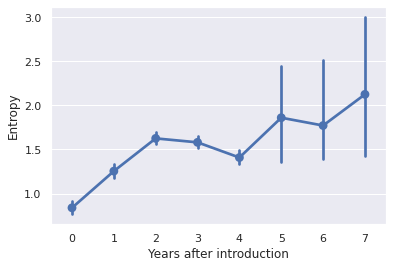

In [20]:
draw_entropy()

In [21]:
def get_js_dists(semantic_cluster):
    """
    Return size-k list of entropy values where
    
    k = the number of years the cluster has had meme instances
    ith index = the entropy value i years after the first instance
    """
    templates = template_clusters.cluster_to_tpl[semantic_cluster]
    instances = get_instances(templates)
    df = pd.DataFrame(instances)

    df.loc[:, "timestamp"] = pd.to_datetime(df.utc, unit="s")
#     df.loc[:, "year"] = df.timestamp.dt.year
    df.loc[:, "year"] = ((df.timestamp - df.timestamp.min()).dt.days / 365.2425).astype(int)
    df = df[df.year != df.year.max]

    counts_by_year_by_tpl = df.groupby([df.year, df.template]).post_id.count().reset_index()
    counts_by_year_by_tpl["proportion"] = counts_by_year_by_tpl.groupby("year").post_id.transform(lambda x: x / x.sum())
    post_dist = counts_by_year_by_tpl.pivot(index="year", columns="template", values="proportion").fillna(0)
    pre_dist = post_dist.shift()

    sample_size = counts_by_year_by_tpl.groupby("year").post_id.sum().min()
    if sample_size < 30:
        return None

    data = []
    
    for (year, pre), (_, post) in zip(pre_dist.iterrows(), post_dist.iterrows()):
        dist = jensenshannon(pre, post)
        data.append({
            "js_div": dist,
            "year": year,
            "cluster": semantic_cluster
        })
    data = pd.DataFrame(data[1:])
#     data["year"] = data["year"] - data["year"].min()
    return data

  0%|          | 0/784 [00:00<?, ?it/s]

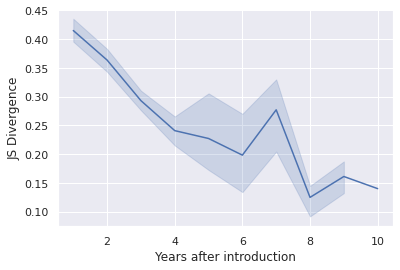

In [22]:
def jsdiv():
    topk = list(template_clusters.cluster_to_tpl.keys())#[:100]
    values = [get_js_dists(clu) for clu in tqdm(topk)]
    values = [value for value in values if value is not None]
    dists = pd.concat(values)

    sns.lineplot(dists, x="year", y="js_div")
    plt.ylabel("JS Divergence")
    plt.xlabel("Years after introduction")
jsdiv()

## Diffusion

In [23]:
def pmi(matrix):
    num_x, num_y = matrix.shape
    total = matrix.sum()
    p_xy = matrix / total
    p_x = matrix.sum(axis=1, keepdims=True) / total
    p_y = matrix.sum(axis=0, keepdims=True) / total
    pmi = np.log2(p_xy) - np.log2(p_x * p_y)
    
    return pmi


def npmi(matrix):
    h_xy = -np.log2(matrix / matrix.sum())
    res = pmi(matrix) / h_xy
    return np.where(np.isnan(res), -1, res)
   
def ppmi(matrix):
    return np.maximum(pmi(matrix), 0)

In [24]:
pmi_dict = {}
for cluster in tqdm(template_clusters.cluster_to_tpl.keys()):
    matrix = create_doc_term_mat(df[df.cluster.eq(cluster)], "subreddit", "template")
    
    a = ppmi(matrix.mat)

    for c, t in zip(*np.unravel_index(range(matrix.mat.size), matrix.mat.shape)):
        pmi_dict[(matrix.idx2word[t], matrix.idx2doc[c])] = a[c, t]

  0%|          | 0/784 [00:00<?, ?it/s]

<ipython-input-23-85692f592341>:7: RuntimeWarning: divide by zero encountered in log2
  pmi = np.log2(p_xy) - np.log2(p_x * p_y)


In [25]:
df.loc[:, "pmi"] = df[["template", "subreddit"]].apply(lambda x: pmi_dict[(x.template, x.subreddit)], axis=1)

In [27]:
def first_subs_for_templates_in_cluster(semantic_cluster):
    templates = template_clusters.cluster_to_tpl[semantic_cluster]
    instances = get_instances(templates)
    df = pd.DataFrame(instances)
    
    return df.sort_values(by="utc").groupby("template").agg({"subreddit": "first"})

def topk_proportions(x):
    counts = x.head(100).value_counts()
    counts /= counts.sum()
    return counts.iloc[0]

def top_sub(x):
    counts = x.head(100).value_counts()
    counts /= counts.sum()
    return counts.index[0]

def origin_analysis():
    # calculate the proportion of each subreddit among the starters
    starter_proportions = df.sort_values("utc").groupby("template").agg(
        proportion = ("subreddit", topk_proportions),
        subreddit = ("subreddit", top_sub)
    )

    # bin proportions for later use
    starter_proportions["binned_proportion"] = starter_proportions.proportion * 100 // 10

    # filter for at least 200, to do before/after
    enough_posts = [tpl for tpl, ct in df.template.value_counts().to_dict().items() if ct > 200]
    ending = df[df.template.isin(set(enough_posts))]

    # construct list of afters for each template
    tmp_dfs = []
    for cluster, inds in tqdm(ending.groupby("template").groups.items()):
        tmp_dfs.append(
            ending.loc[inds].sort_values("utc", ascending=True).iloc[100:]
        )
    ending_df = pd.concat(tmp_dfs, axis=0)

    # calculate after PMI
    ending_pmi_dict = {}
    for cluster in tqdm(ending_df.cluster.unique()):
        matrix = create_doc_term_mat(ending_df[ending_df.cluster.eq(cluster)], "subreddit", "template")

        a = ppmi(matrix.mat)

        if matrix.mat.size == 0:
    #             print(cluster)
            continue

        for c, t in zip(*np.unravel_index(np.array(range(matrix.mat.size)), matrix.mat.shape)):
            ending_pmi_dict[(matrix.idx2word[t], matrix.idx2doc[c])] = a[c, t]

    ending_df.loc[:, "pmi"] = ending_df[["template", "subreddit"]].apply(lambda x: ending_pmi_dict.get((x.template, x.subreddit), None), axis=1)


    starter_subs = starter_proportions.to_dict()["subreddit"]
    mask = ending_df.subreddit.ne(df.template.apply(starter_subs.get))

    final_pmis = pd.DataFrame(
        dict(pmi=starter_proportions.reset_index()[["template", "subreddit"]].apply(lambda x: ending_pmi_dict.get((x.template, x.subreddit), None), axis=1),
        template=starter_proportions.index)
    ).set_index("template").pmi


    # final_control is the avg PMI of non-starters
    # final_pmi is the PMI of the starter sub for each

    starter_proportions.loc[:, "final_control"] = ending_df[mask].groupby("template").pmi.agg("mean")
    starter_proportions.loc[:, "final_pmi"] = final_pmis

    return starter_proportions

In [28]:

def linregplot(starter_proportions):
    data = starter_proportions
    data = data[data.proportion.between(0.5, 1, inclusive="left")]
    sns.regplot(
        data=data,
        x="proportion",
        y=data.final_pmi - data.final_control,
    )
    plt.ylabel("Origin PMI - Control PMI")
    plt.xlabel("Proportion of Seed Posts by Innovator Subreddit")

def linregplotb(starter_proportions):
    data = starter_proportions
    data = data[data.proportion.between(0.5, 1, inclusive="left")]
    sns.regplot(
        data=data,
        x="proportion",
        y=data.final_pmi,
    )
    plt.ylabel("Origin PMI")
    plt.xlabel("Proportion of Seed Posts by Innovator Subreddit")
    plt.savefig("../figures/div_linregress.pdf")
    
def compareplot(starter_proportions):
    data = starter_proportions.dropna(subset=["final_pmi", "final_control"])
    data = data[data.proportion.between(0.5, 1, inclusive="left")]
    data = data.melt(
        id_vars=["binned_proportion", "subreddit"],
        value_vars=["final_pmi", "final_control"],
        var_name="Group",
        value_name="PPMI"
    )
    sns.pointplot(
        data=data.assign(
            Group=data["Group"].map({"final_pmi": "Origin subreddit", "final_control": "Other subreddits"})
        ),
        x=data.binned_proportion / 10,
        y="PPMI",
        hue="Group"
    )
    plt.xlabel("% of first 100 posts in origin subreddit")
    plt.savefig("../figures/divergence.pdf")

In [29]:
def regress(starter_proportions):
    # do paired ttest
    data = starter_proportions.dropna(subset=["final_pmi", "final_control"])
    data = data[data.proportion.between(0.5, 1, inclusive="left")]
#     results = stats.ttest_rel(data.final_pmi, data.final_control)
    print("Paired t-test for each cluster")
    print(stats.linregress(data.proportion, data.final_pmi - data.final_control))

In [31]:
starter_proportions = origin_analysis()

  0%|          | 0/3683 [00:00<?, ?it/s]

  0%|          | 0/702 [00:00<?, ?it/s]

<ipython-input-23-85692f592341>:7: RuntimeWarning: divide by zero encountered in log2
  pmi = np.log2(p_xy) - np.log2(p_x * p_y)
<ipython-input-27-dcabfa9e21b3>:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  starter_proportions.loc[:, "final_control"] = ending_df[mask].groupby("template").pmi.agg("mean")


In [32]:
regress(starter_proportions)

Paired t-test for each cluster
LinregressResult(slope=3.8349818189385787, intercept=-2.354880105716605, rvalue=0.5046915037221197, pvalue=1.1844118404801556e-59, stderr=0.21830066757602912, intercept_stderr=0.13621971707415811)


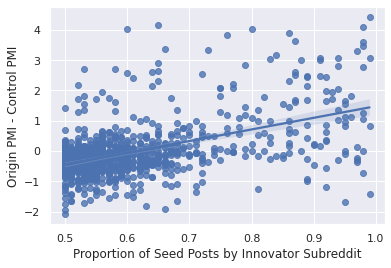

In [33]:
linregplot(starter_proportions)

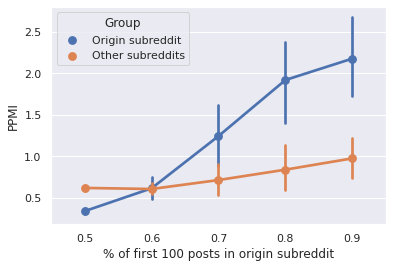

In [34]:
compareplot(starter_proportions)

# Acculturation

In [ ]:
tmp = df.sort_values("utc").groupby(["subreddit", "user"])
df["comment_timedelta"] = tmp.utc.transform(lambda x: x - x.iloc[0])
df.comment_timedelta = pd.to_timedelta(df.comment_timedelta, unit="s")

a = df[
    df.user.ne("[deleted]")
    & ~df.user.str.lower().str.contains("bot")
    & df.comment_timedelta.dt.days.lt(12 * 30)
]

user_counts = a.groupby(["subreddit", "user"]).post_id.count().reset_index()
keep_user_subs = {(x.subreddit, x.user) for x in user_counts[user_counts.post_id.gt(10)][["subreddit", "user"]].itertuples()}
mask = a[["subreddit", "user"]].apply(lambda x: (x.subreddit, x.user) in keep_user_subs, axis=1)
grouped = a[mask].groupby(["subreddit", "user", a[mask].comment_timedelta.dt.days // 30]).pmi.mean().reset_index()

keep_groups = grouped.subreddit.value_counts()[grouped.subreddit.value_counts() >= 30].index



In [ ]:
len(g.user.unique())

In [ ]:
np.random.seed(0xb1ab)
g = grouped[grouped.subreddit.isin(keep_groups)].groupby('subreddit', group_keys=False).apply(lambda x: x.sample(min(len(x), 100), replace=True))

In [ ]:
sns.pointplot(x=g.comment_timedelta, y=g.pmi)

plt.xlabel("Months since first comment")
plt.ylabel("PPMI")
plt.savefig("../figures/acculturation.pdf")

In [ ]:
print(stats.pearsonr(g.comment_timedelta, g.pmi))